In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
# Train
batch_size = train_images.shape[0]
input_dim = train_images.shape[1] *  train_images.shape[2]
X_train = np.reshape(train_images, (batch_size, input_dim))
print("train_images의 shape: ",end="")
print(train_images.shape)
print("Flatten 전: (" + str(train_images.shape[1]) +", "+ str(train_images.shape[2]) +"), 후: " + str(input_dim))

print("결과")
print(X_train.shape)

# Test
batch_size = test_images.shape[0]
input_dim = test_images.shape[1] *  test_images.shape[2]
X_test = np.reshape(test_images, (batch_size, input_dim))
print(X_test.shape)

train_images의 shape: (60000, 28, 28)
Flatten 전: (28, 28), 후: 784
결과
(60000, 784)
(10000, 784)


In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels) # one-hot encoding
Y_test = to_categorical(test_labels)
print('Y_train.shape is ', Y_train.shape)
print('one-hot encoded first Y_train is ', Y_train[0])

Y_train.shape is  (60000, 10)
one-hot encoded first Y_train is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# 데이터의 개수를 확인하고 8:2 비율로 나눈다.
total = X_train.shape[0]
split_point = int(0.8 * total)

# 훈련 데이터를 훈련 세트와 검증 세트로 나눈다.
x_val = X_train[:split_point]
partial_x_train = X_train[split_point:]
y_val = Y_train[:split_point]
partial_y_train = Y_train[split_point:]

Model1 아키텍쳐 설정 (m1=16, m2=10)

첫 번째 layer는 16개의 뉴런, 두 번째 layer는 10개의 뉴런을 가짐

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Dense(16, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
%matplotlib inline
hist = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=10,validation_data=(x_val, y_val))

Epoch 1/20
1200/1200 [==============================] - 8s 6ms/step - loss: 0.6284 - accuracy: 0.8213 - val_loss: 0.3743 - val_accuracy: 0.8943
Epoch 2/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2942 - accuracy: 0.9147 - val_loss: 0.3238 - val_accuracy: 0.9081
Epoch 3/20
1200/1200 [==============================] - 7s 6ms/step - loss: 0.2436 - accuracy: 0.9303 - val_loss: 0.3072 - val_accuracy: 0.9125
Epoch 4/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2122 - accuracy: 0.9403 - val_loss: 0.2917 - val_accuracy: 0.9181
Epoch 5/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1933 - accuracy: 0.9442 - val_loss: 0.2811 - val_accuracy: 0.9197
Epoch 6/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1758 - accuracy: 0.9497 - val_loss: 0.2755 - val_accuracy: 0.9232
Epoch 7/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1613 - accuracy: 0.9545 - val_loss: 0.2804 - val_accuracy:

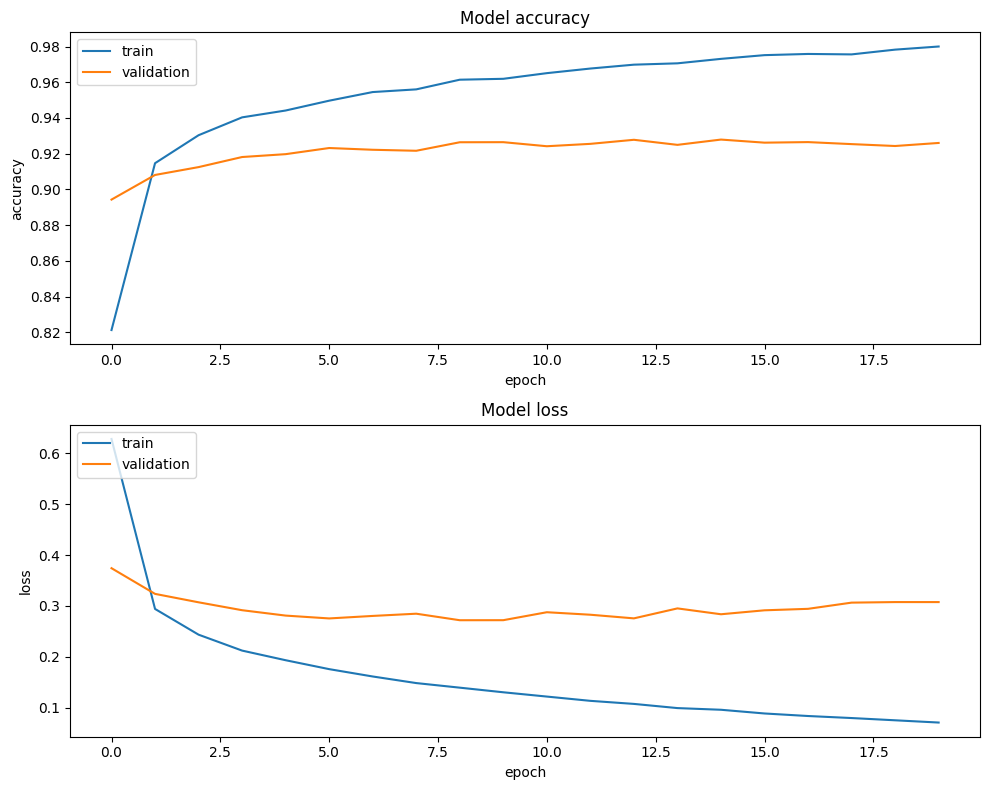

In [11]:
# 훈련 및 검증 손실과 정확도 그래프 그리기
fig, axs = plt.subplots(2, figsize=(10, 8))  # 그래프의 크기를 조정합니다.
axs[0].plot(hist.history['accuracy'])
axs[0].plot(hist.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')

axs[1].plot(hist.history['loss'])
axs[1].plot(hist.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')

plt.tight_layout()  # 겹치는 부분을 자동으로 조정합니다.
plt.show()


In [12]:
# 테스트 데이터로 모델 평가
test_loss, test_acc = model.evaluate(X_test, Y_test)  # 평탄화 및 원-핫 인코딩된 데이터 사용
print(f'test accuracy: {test_acc:.4f}')
print(f'test loss: {test_loss:.4f}')


313/313 [==============================] - 0s 963us/step - loss: 0.2723 - accuracy: 0.9299
test accuracy: 0.9299
test loss: 0.2723


In [13]:
# 최적의 에폭과 마지막 검증 정확도를 찾기
best_epoch = np.argmax(hist.history['val_accuracy']) + 1
final_val_accuracy = hist.history['val_accuracy'][-1]
print(f"최적의 epoch: {best_epoch}")
print(f"최종 validation accuracy: {final_val_accuracy:.4f}")

최적의 epoch: 15
최종 validation accuracy: 0.9260


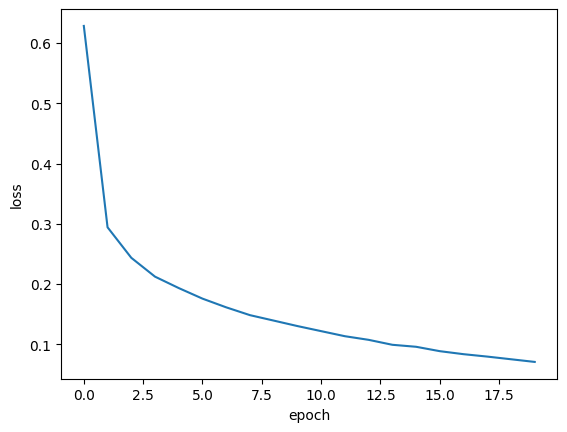

In [14]:
hist.history.keys()

plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()